# Introduction to Data Science – Homework 5
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 21, 2025, 11:59pm.

In this homework you will use linear regression to study house prices in Salt Lake City.

## Your Data
Fill out the following information: 

*First Name:*   Carter \
*Last Name:*   Hardy \
*E-mail:* carter.n.hardy@utah.edu \
*UID:*  u1538956


# Importing all the libraries 

In [144]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

## Regression of real estate data
For this problem, you will analyze SLC real estate data. The dataset contains multiple listing service (MLS) real estate transactions for houses sold in recent years in zip code 84103 ([SLC avenues neighborhood](https://www.google.com/maps/place/Salt+Lake+City,+UT+84103/@40.8030372,-111.8957957,12z/data=!3m1!4b1!4m5!3m4!1s0x87525f672006dded:0x311e638d9a1a2de5!8m2!3d40.810506!4d-111.8449346)). We are primarily interested in regressing the `SoldPrice` on the house attributes (`property size`, `house size`, `number of bedrooms`, etc...). 


### Task 1.1: Import the data 
Use the [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to import the dataset. The data is contained in two files located in the same directory as this notebook: [`train1.csv`](train1.csv) and [`train2.csv`](train2.csv). After you import these files separately, concatenate them into one big dataframe. This pandas dataframe will be used for data exploration and linear regression. 

In [145]:
# your code goes here
train1 = pd.read_csv('train1.csv')
train2 = pd.read_csv('train2.csv')

df = pd.concat([train1, train2])

### Task 1.2: Understand the Data

Now that the data is loaded, try to understand the data. Domain knowledge is always important for most data science tasks.

- Print different information and statistics of the data (i.e. df.head(), df.info(), df.describe(), df.shape, df.columns etc.). There are 172 different variables associated with each of the 555 houses in this dataset. Skim them and try to get a rough understanding of what information this dataset contains. If you've never seen a real estate listing before, you might take a look at one on [this](http://www.utahrealestate.com/) website to get a better sense of the meanings of the column headers in the dataset.  

- Print all the columns of the data

In [146]:
# Code goes here
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 555 entries, 0 to 277
Columns: 172 entries, MLS_ to Last_Modified_Date
dtypes: float64(29), int64(51), object(92)
memory usage: 750.1+ KB


,MLS_,Acres,Back_Dimensions,Basement_Finished,Contact_Phone_One,Contact_Phone_Two,Contact,Carport_Capacity,DOM,Decks,...,Total_Three_quarter_Bathrooms,Total_Family_Rooms,Total_Fireplaces,Total_Formal_Dining_Rooms,Total_Kitchens,Total_Laundry_Rooms,Total_Semi_formal_Dining_Rooms,Construction_Status,Year_Built,Zip
count,5.550000e+02,555.000000,555.000000,555.000000,0.0,0.0,0.0,555.000000,514.000000,555.000000,...,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,8.0,555.000000,555.0
mean,1.937132e+06,0.142667,1.007387,38.909910,NaN,NaN,NaN,0.126126,56.900778,0.639640,...,0.715315,1.028829,0.958559,0.338739,0.918919,0.969369,0.506306,1.0,1956.093694,84103.0
std,6.482822e+04,0.293939,8.363707,45.907014,NaN,NaN,NaN,0.427340,62.358799,0.794757,...,0.816150,0.720433,1.014379,0.477503,0.519218,0.450590,0.545292,0.0,39.837874,0.0
min,1.811200e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1852.000000,84103.0
25%,1.875286e+06,0.010000,0.000000,0.000000,NaN,NaN,NaN,0.000000,10.250000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1915.500000,84103.0
50%,1.955201e+06,0.080000,0.000000,0.000000,NaN,NaN,NaN,0.000000,37.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1963.000000,84103.0
75%,1.994768e+06,0.160000,0.000000,95.000000,NaN,NaN,NaN,0.000000,81.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1980.000000,84103.0
max,2.058026e+06,4.590000,115.000000,100.000000,NaN,NaN,NaN,4.000000,385.000000,5.000000,...,5.000000,4.000000,6.000000,2.000000,3.000000,3.000000,2.000000,1.0,2024.000000,84103.0


In [147]:
df.head()

,MLS_,Driveway,Acres,Air_Conditioning,Amenities,Area,Back_Dimensions,Basement,Basement_Finished,Canceled_Date,...,Total_Square_Feet,Construction_Status,Unit_Lot_Number,Water,Window,Withdrawn_Date,Year_Built,Zip,Zoning_Character,Last_Modified_Date
0,1987748,Concrete,0.01,Central Air; Electric,Clubhouse; Electric Dryer Hookup; Exercise Roo...,Salt Lake City: Avenues Area,0.0,None/Crawl Space,0,00/00/0000,...,"1,648",NaN,802,Culinary,Blinds; Full,00/00/0000,1976,84103,5905,5/10/2024
1,1993546,Common Drive,0.09,Central Air; Electric,Cable TV Available; Electric Dryer Hookup,Salt Lake City: Avenues Area,0.0,Other,0,00/00/0000,...,"2,633",NaN,NaN,Culinary,Blinds; Full,00/00/0000,1895,84103,1205,5/24/2024
2,1991915,Asphalt,0.01,Central Air; Electric,Exercise Room; Gated Community; Swimming Pool,Salt Lake City: Avenues Area,0.0,None/Crawl Space,0,00/00/0000,...,826,NaN,138,Culinary,NaN,00/00/0000,1961,84103,RMF-35,6/20/2024
3,1881930,Concrete,0.11,Central Air; Electric,Cable TV Wired; Electric Dryer Hookup; Gas Dry...,Salt Lake City: Avenues Area,0.0,Daylight; Full,100,00/00/0000,...,"2,653",NaN,NaN,Culinary,Blinds; Full; Shades,00/00/0000,1956,84103,1205,5/15/2024
4,2023690,Concrete,0.01,Central Air; Electric; Active Solar,Home Warranty,Salt Lake City: Avenues Area,0.0,None/Crawl Space,0,00/00/0000,...,935,NaN,25-May,NaN,NaN,00/00/0000,2024,84103,NaN,12/27/2024


In [148]:
#I know I can do print(df.columns.tolist()) but I found this to be difficult to read. I tried writing a function that would
#print out in chunks of 10 to make it more readable. It did not neccesarily make it better, but I already wrote it so I will keep it.

def print_columns(df, chunk_size = 10):
    columns_name = list(df.columns)
    num_col = len(columns_name)

    for i in range(0, num_col, chunk_size):
        chunk = columns_name[i:i + chunk_size]
        print(chunk)

print_columns(df)

['MLS_', 'Driveway', 'Acres', 'Air_Conditioning', 'Amenities', 'Area', 'Back_Dimensions', 'Basement', 'Basement_Finished', 'Canceled_Date']
['City', 'Contact_Phone_One', 'Contact_Phone_Two', 'Contact', 'Under_Contract_Date', 'County', 'Carport_Capacity', 'DOM', 'Decks', 'Pre_directional']
['Post_directional', 'East_West_Coordinates', 'Entered_By', 'Entry_Date', 'Exclusions', 'Expiration_Date', 'Exterior', 'Exterior_Features', 'Interior_Features', 'Floor']
['Front_Dimensions', 'Garage_Capacity', 'Garage_Parking', 'HOA_Fee', 'HOA_Terms', 'Heating', 'House_Number', 'Photo', 'Inclusions', 'Irregular_Shape']
['Landscape', 'Effective_Date_Of_The_Listing_Agreement', 'Listing_Type', 'Lot_Facts', 'Sold_Price', 'Listing_Price', 'North_South_Coordinates', 'Active_No_Show_Date', 'Office', 'Owner']
['Main_Floor_Bedrooms', 'Main_Floor_Full_Bathrooms', 'Main_Floor_Half_Bathrooms', 'Main_Floor_Three_quarter_Bathrooms', 'Main_Floor_Fireplaces', 'Main_Floor_Square_Feet', 'Main_Floor_Dens', 'Main_Floor_F

### Task 2: Clean the data 

- Only keep houses with Listing Price between 500,000 and 1200,000 dollars both inclusive. This is an arbitrary choice and we realize that some people are high rollers, but for our purposes we'll consider the others as outliers. 

- Remove columns that you don't think contribute to the value of the house. This is a personal decision – what attributes of a house are important to you? 
You should at least keep the following variables since questions below will use them: `['Acres', 'Decks', 'Garage_Capacity', 'East_West_Coordinates', 'North_South_Coordinates', 'DOM', 'Sold_Price', 'Parking_Capacity', 'Property_Type', 'Listing_Price', 'Estimated_Taxes', 'Total_Bedrooms', 'Total_Bathrooms', 'Total_Square_Feet', 'Year_Built']` 

- Check the datatypes and convert any numbers that were read as strings to numerical values. (Hint: You can use [`str.replace()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) to work with strings.) If there are any categorical values you're interested in, then you should convert them to numerical values as in Lecture. In particular, convert `Property_Type` to 2 columns titled `Property_Type_Condo` and `Property_Type_Townhouse` by one-hot encoding them.
 
$$
\text{Property_Type_Condo}_i = \begin{cases} 
1 & \text{if $i$-th listing is a Condo} \\
0 & \text{otherwise}
\end{cases}. 
$$

$$
\text{Property_Type_Townhouse}_i = \begin{cases} 
1 & \text{if $i$-th listing is a Townhouse} \\
0 & \text{otherwise}
\end{cases}. 
$$

- Drop all rows with `Estimated_Taxes` = 1.

In [149]:
# your code goes here
#Listing Price between 500,000 and 1200,000 dollars both inclusive
df = df[(df['Listing_Price'] >= 500000) & (df['Listing_Price']<= 1200000)]
df.shape

(293, 172)

In [150]:
#Columns I think contribute to the value of the home
df_use = df[['Acres', 'Decks', 'Garage_Capacity', 'East_West_Coordinates', 'North_South_Coordinates', 'DOM', 'Sold_Price', 
             'Parking_Capacity', 'Property_Type', 'Listing_Price', 'Estimated_Taxes', 'Total_Bedrooms', 'Total_Bathrooms', 
             'Total_Square_Feet', 'Year_Built', 'HOA_Fee','Total_Full_Bathrooms', 'Total_Half_Bathrooms',
             'Basement_Finished']].copy()

In [151]:
#check datatypes and convert necessary numbers
#print(df_use.dtypes)

#after using once it throws an error when it runs again. Now total square feet is a float.

df_use['Total_Square_Feet'] = df_use['Total_Square_Feet'].str.replace(',', '').astype(float)

In [152]:
#add each property type to a new column
df_use['Property_Type_Condo'] = (df_use['Property_Type'] == 'Condo').astype(int)
df_use['Property_Type_Townhouse'] = (df_use['Property_Type'] == 'Townhouse').astype(int)

#it wasnt clear if I should add single family to this, but I included one as well
df_use['Property_Type_SingleFamily'] = (df_use['Property_Type'] == 'Single Family').astype(int)

#I am taking the old property_type column and copying it here for an extra copy
property_type_og = df_use['Property_Type']
print(df_use.dtypes)

Acres                         float64
Decks                           int64
Garage_Capacity                 int64
East_West_Coordinates           int64
North_South_Coordinates         int64
DOM                           float64
Sold_Price                      int64
Parking_Capacity                int64
Property_Type                  object
Listing_Price                 float64
Estimated_Taxes               float64
Total_Bedrooms                  int64
Total_Bathrooms                 int64
Total_Square_Feet             float64
Year_Built                      int64
HOA_Fee                       float64
Total_Full_Bathrooms          float64
Total_Half_Bathrooms            int64
Basement_Finished               int64
Property_Type_Condo             int64
Property_Type_Townhouse         int64
Property_Type_SingleFamily      int64
dtype: object


In [153]:
#instead of dropping property_type, I am making a new dataframe named df_clean. This is to help me keep track of my df
df_clean = df_use[['Acres', 'Decks', 'Garage_Capacity', 'East_West_Coordinates', 'North_South_Coordinates', 'DOM', 'Sold_Price', 
             'Parking_Capacity', 'Listing_Price', 'Estimated_Taxes', 'Total_Bedrooms', 'Total_Bathrooms', 
             'Total_Square_Feet', 'Year_Built', 'HOA_Fee','Total_Full_Bathrooms', 'Total_Half_Bathrooms',
             'Basement_Finished','Property_Type_SingleFamily', 'Property_Type_Townhouse','Property_Type_Condo']].copy()

print(df_clean.dtypes)

Acres                         float64
Decks                           int64
Garage_Capacity                 int64
East_West_Coordinates           int64
North_South_Coordinates         int64
DOM                           float64
Sold_Price                      int64
Parking_Capacity                int64
Listing_Price                 float64
Estimated_Taxes               float64
Total_Bedrooms                  int64
Total_Bathrooms                 int64
Total_Square_Feet             float64
Year_Built                      int64
HOA_Fee                       float64
Total_Full_Bathrooms          float64
Total_Half_Bathrooms            int64
Basement_Finished               int64
Property_Type_SingleFamily      int64
Property_Type_Townhouse         int64
Property_Type_Condo             int64
dtype: object


In [154]:
#Drop all rows with Estimated_Taxes = 1

df_clean= df_clean[df_clean['Estimated_Taxes'] != 1]

In [155]:
#check shape to confirm changes
df_clean.shape

(282, 21)

### Task 3: Exploratory data analysis and Visulization

- Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo). 

- Compute the correlation matrix and use a heat map to visualize the correlation coefficients. 
    - Use a diverging color scale from -1 to +1 (see `vmin` and `vmax` parameters for [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html))
    - Show a legend
    - Make sure the proper labels are visible and readable (see [`xticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xticks.html) and the corresponding [`yticks`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yticks.html)).
- Describing your findings. 

#### Optional Task
Another great way to visualize the correlations is using scatter plot matrix. If you color-code the dots by property type and draw the distribution of the variable in the diagonal cells of the matrix, you will see a beautiful graph of correlations (Hint: Use `pd.plotting.scatter_matrix`). You should use only a subset of the columns: `['Acres', 'Listing_Price', 'Parking_Capacity', 'Sold_Price', 'Estimated_Taxes', 'Total_Bedrooms', 'Total_Bathrooms', 'Total_Square_Feet', 'Year_Built']`. 

**Hint**: Use the code beloww to create a color map.

```python
type_color_map = red["Property_Type"].map({"Single Family":"#ca0020", "Condo":"#0571b0", "Townhouse":"#1b7837"})
```

And then use that as color in the plotting function like below

```python
pd.plotting.scatter_matrix(df, figsize=figsize, diagonal='kde', color=type_color_map)` function.
```


Text(0.5, 1.0, 'Distribution of Property Types')

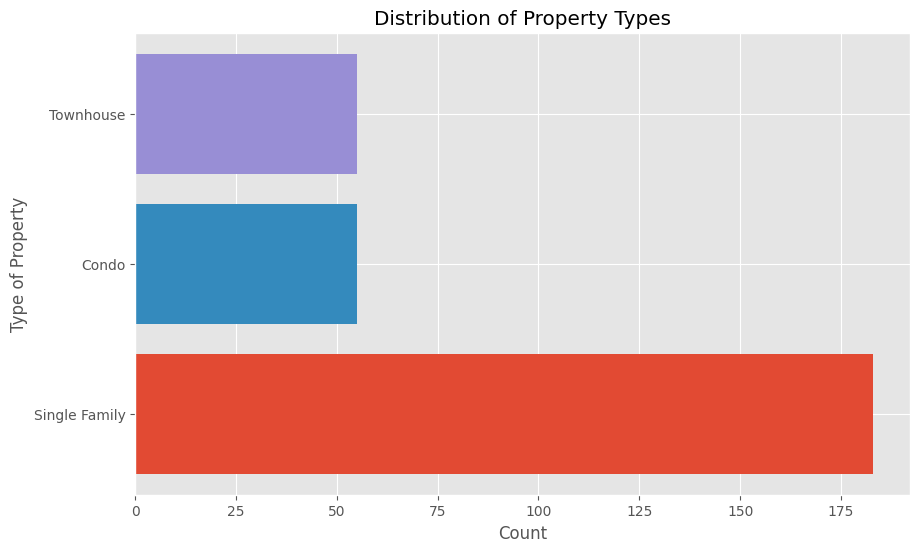

In [156]:
# your code goes here (You can use as many cells as you want, and as many markdown cells for explanations as you want)

#bar chart
property_count = property_type_og.value_counts()
fig, ax = plt.subplots()

#use a horizontal bar chart for readability, choose 3 different colors for readability
ax.barh(property_count.index, property_count.values, color = ['C0', 'C1', 'C2'])

#labels and titles
plt.xlabel('Count')
plt.ylabel('Type of Property')
plt.title('Distribution of Property Types')

**Your Interpretation:**  

We see that single family houses is the majority type of property in the dataset. Also there is almost an equal count of condos and townhouses.

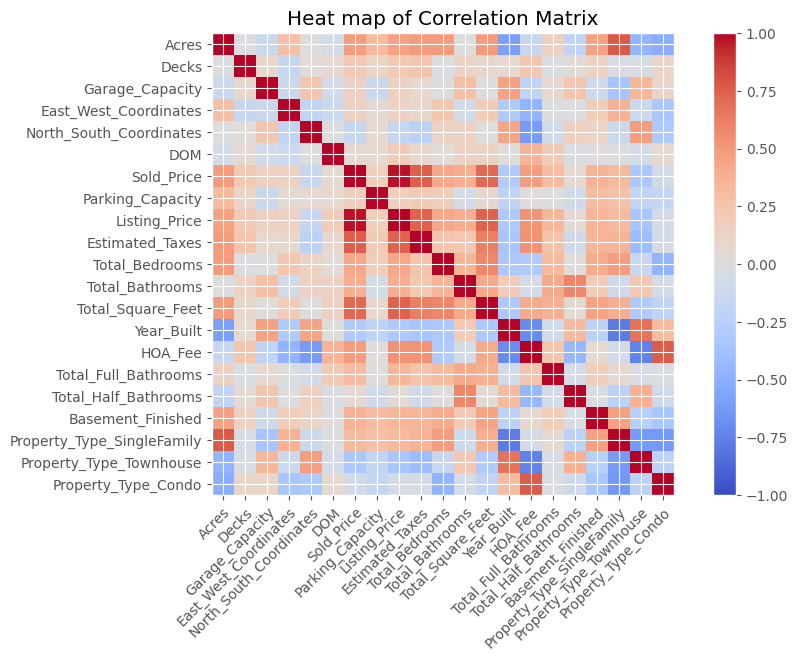

In [157]:
#heat map using a correlation matrix

#make correlation matrix
correlation_matrix = df_clean.corr()

#make figure subplot
fig, ax = plt.subplots()

#use imshow to make the heatmap, choose coolwarm as the diverging color, on a scale from -1 to 1
im = ax.imshow(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1)

#to make the labels I am going to add columns to a list
label = df_clean.columns.tolist()

#set tickets to the labels and rotate for readability 
ax.set_xticks(range(len(label)), labels = label,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(label)), labels = label)

#add title
ax.set_title('Heat map of Correlation Matrix')

#add a color bar as a legend
fig.colorbar(im)

**Your Interpretation:** Using a color map with a divering color scale we can see what variables have high correlation and low correlation easily. \
We can easily see that listing price and sold price have a strong correlation, listing price and estimated sales have some correlation while sold price and estmiated sales also have some correlation. Some more unique correlations we see is condos and HOA fees. \
We can also easily identify some low correlations between the variables. HOA fees has a weak correlation with year built, townhouses as the property type, and north south coordinates. Year built also has a weak correlation with acres and single family houses as a property type.

### Task 4: Geospatial plot
Two of the variables are the East-West Coordinates and North-South Coordinates of each listing. These values are extracted from the latitude and longitude of each listing in Salt Lake City. Create a scatterplot of these two variables. Use color to indicate the listing price of the house. 

What can you say about the relation between the location and the listing price?  

Text(0.5, 0.98, 'EW coordinates and NS coordinates colored by Listing Price')

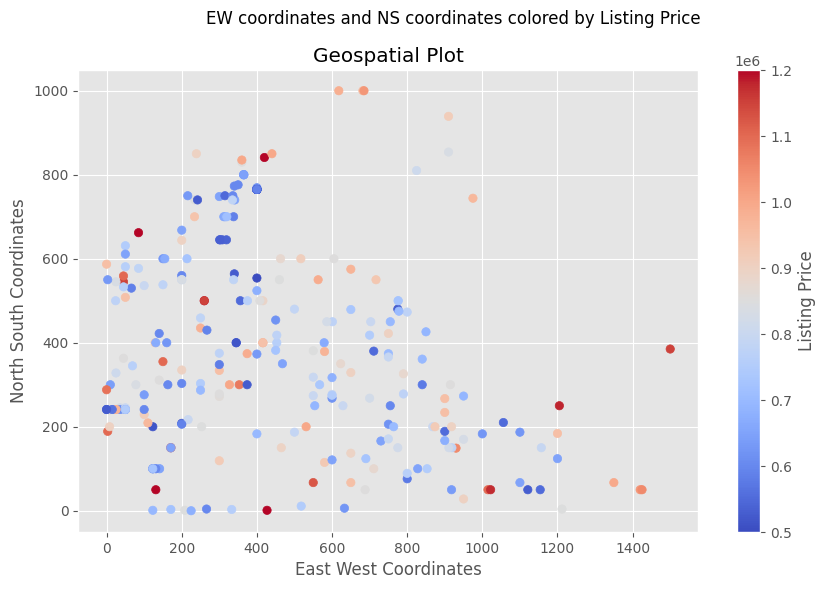

In [158]:
# your code goes here
#scatterplot code, choosing color (c) to be determined by listing price 
plt.scatter(x=df_clean['East_West_Coordinates'], y=df_clean['North_South_Coordinates'], cmap = 'coolwarm', c = df_clean['Listing_Price'])

#color bar to show what color represents
plt.colorbar(label = 'Listing Price')

#labels
plt.xlabel('East West Coordinates')
plt.ylabel('North South Coordinates')

#titles, added a subtitle to include what the plot is
plt.title('Geospatial Plot')
plt.suptitle('EW coordinates and NS coordinates colored by Listing Price')

**Your Interpretation:** **What can you say about the relation between the location and the listing price?**   

Between the east west coordinates of 200 and 400 (between 200 and 400 on the x axis) and then between the coordinates of 400 and 800 on north south coordinates (y axis) there is a high density of houses with a listing price that are cheaper (Blue) meaning a price listed around 500,000 - 600,000.  

The more expensive properties (Red) seem to be spartically spread through the data. There seems to be no real pattern to where they fit. It seems that the majority of the expensive properties (Red) are within the NS coordinates of 200 and 600, however there are still some expensive properties outside of these NS coordinate. The ones within NS coord 200-600 they vary where they are across the EW coordinates.  

The top right portion of the graph, is empty showing that there are no listing, but in these empty areas the listing seem to be slightly more expensive. The majority of properties are below the NS coor of 800 and below the EW coord of 1200. 

### Task 5: Simple  Linear Regression 
Use the `ols` function from the [statsmodels](http://www.statsmodels.org/stable/index.html) package to regress the Sold price on some of the other variables. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x, 
$$
where $x$ is one of the other variables. 

You'll find that the best predictor of sold price is the listing price. Report the R-squared value for this model (`Sold_Price ~ Listing_Price`) and give an interpretation for its meaning. Also give an interpretation of $\beta_1$ for this model. Make a scatterplot of listing price vs. sold price and overlay the prediction coming from your regression model. 

In [159]:
# Your code here

#trying different variables

#sold and estimated taxes:

sold_tax_ols = sm.ols(formula = 'Sold_Price ~ Estimated_Taxes', data=df_clean).fit()
sold_tax_ols.summary()
#r-square value of .57
#Coef is 112.99

#sold and total square feet:

sold_sqfeet_ols = sm.ols(formula = 'Sold_Price ~ Total_Square_Feet', data=df_clean).fit()
sold_sqfeet_ols.summary()
#r-square value of .514
#coef is 178.62


#sold and hoa fees:

sold_hoafee_ols = sm.ols(formula = 'Sold_Price ~ HOA_Fee', data=df_clean).fit()
sold_hoafee_ols.summary()
#R-square value of .234
#coefficient 275.04


#SOLD AND LISTING PRICE:
sold_list_ols = sm.ols(formula = 'Sold_Price ~ Listing_Price', data=df_clean).fit()
sold_list_ols.summary()
#r-square value of .949
#coef is .9296

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sold_Price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     5212.
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          5.31e-183
Time:                        17:26:17   Log-Likelihood:                -3366.5
No. Observations:                 282   AIC:                             6737.
Df Residuals:                     280   BIC:                             6744.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.42e+04   1.01e+04      3.401      0.001    1.44e+04     5.4e+04
Listing_Price     0.9296      0.013     72.197      0.000       0.904       0.955
==============================================================================
Omnibus:                      124.033   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.453
Skew:                          -1.959   Prob(JB):                     1.84e-92
Kurtosis:                       7.539   Cond. No.                     3.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation:**  
The r-squared value of .949 tells us that 94.9% of the variance in Sold Price can be explained by Listing Price in this model.  

the coefficient $\beta_1$ =  .9296, this means that for every 1 unit increase of listing price, the sold price is expected to increase by .9296 units.

Text(0.5, 0.98, 'Sold price and Listing price with OLS equation laid over it')

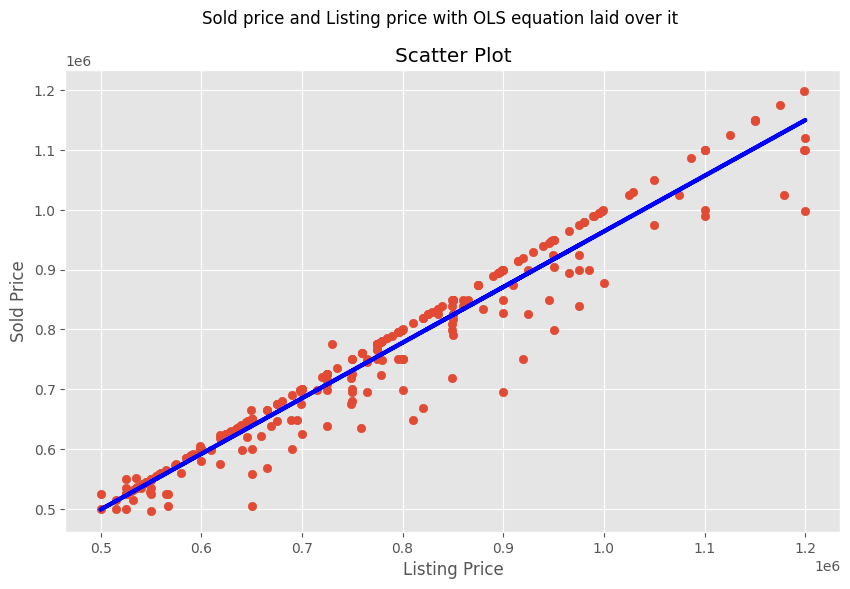

In [160]:
#Scatter plot of sold price and listing price with the equation laid over it
x = df_clean['Listing_Price'].tolist()
y = df_clean['Sold_Price'].tolist()
plt.scatter(x,y)

plt.plot(df_clean['Listing_Price'],sold_list_ols.predict(),color='blue',linewidth=3)
plt.xlabel('Listing Price')
plt.ylabel('Sold Price')
plt.title('Scatter Plot')
plt.suptitle('Sold price and Listing price with OLS equation laid over it')

### Task 6: Multilinear Regression 
Develop a multilinear regression model for house prices in this neighborhood. We could use this to come up with a list price for houses coming on the market, so do not include the list price in your model and, for now, ignore the categorical variable Property_Type or it's one-hot encodings. Your model should be of the form:
$$
\text{Sold Price} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots +  \beta_n x_n, 
$$
where $x_i$ are predictive variables.


**Question 1**: If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your new model compare to the model in Task 5 just using list price?

Next look at the difference between list price and sold price explicitly. Calculate two new columns for your dataset. `DiffPriceAbsolute` and `DiffPriceRelative`.

* `DiffPriceAbsolute` - This is difference between sold price and list price. If it is positive, that means the house sold for more than it was listed at.
* `DiffPriceRelative` - This is the relative difference between sold price and list price. A value of 1.1 here means that the house sold for 110% of the listing price, and 0.9 means the house sold for 90% of the listing price.

Now, create two new models. One to predict `DiffPriceAbsolute`, and one to predict `DiffPriceRelative`. Use the same predictive variables as in the last model.


**Question 2**: Which of these two new models makes better predictions?

**Question 3**: Based on your answer to question two, why are these models different/the same?

To help justify your answer to question 3, train two models to predict `DiffPriceAbsolute` and `DiffPriceRelative` based on just `Sold_Price`. In addition, for each model make a scatterplots similar to Task 5 for these models.

In [161]:
# your code goes here

#Columns used:
#Acres, Decks, Garage_Capacity, East_West_Coordinates, North_South_Coordinates, DOM, Parking_Capacity, Estimated_Taxes, Total_Bedrooms, Total_Bathrooms, Total_Square_Feet, Year_Built, HOA_Fee, Total_Full_Bathrooms, Total_Half_Bathrooms, Basement_Finished

sold_multi_ols = sm.ols(formula = 'Sold_Price ~ Acres + Decks + Garage_Capacity + East_West_Coordinates + North_South_Coordinates + DOM + Parking_Capacity + Estimated_Taxes + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + Year_Built + HOA_Fee + Total_Full_Bathrooms + Total_Half_Bathrooms +Basement_Finished',
                       data = df_clean).fit()

sold_multi_ols.summary()
#r-square .815

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sold_Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     16.24
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           5.63e-16
Time:                        17:26:21   Log-Likelihood:                -954.44
No. Observations:                  76   AIC:                             1943.
Df Residuals:                      59   BIC:                             1983.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.575e+06   2.34e+06     -1.954      0.055   -9.26e+06     1.1e+05
Acres                    2.326e+06   1.12e+06      2.072      0.043    7.92e+04    4.57e+06
Decks                    3.358e+04    1.3e+04      2.588      0.012    7617.858    5.95e+04
Garage_Capacity         -2.032e+04   2.32e+04     -0.878      0.384   -6.67e+04     2.6e+04
East_West_Coordinates      61.8400     79.985      0.773      0.443     -98.209     221.889
North_South_Coordinates  -481.0186     90.128     -5.337      0.000    -661.365    -300.672
DOM                       -59.3398    172.004     -0.345      0.731    -403.519     284.840
Parking_Capacity        -1632.5914   1.35e+04     -0.121      0.904   -2.86e+04    2.53e+04
Estimated_Taxes            36.7549     13.935      2.638      0.011       8.870      64.640
Total_Bedrooms           1.017e+05   2.45e+04      4.158      0.000    5.27e+04    1.51e+05
Total_Bathrooms         -1976.5931   3.32e+04     -0.060      0.953   -6.83e+04    6.44e+04
Total_Square_Feet         163.8298     30.815      5.317      0.000     102.169     225.490
Year_Built               2413.7271   1176.448      2.052      0.045      59.660    4767.795
HOA_Fee                    72.6106    105.157      0.690      0.493    -137.808     283.029
Total_Full_Bathrooms    -7.663e+04   2.25e+04     -3.413      0.001   -1.22e+05   -3.17e+04
Total_Half_Bathrooms     6.519e+04   3.97e+04      1.643      0.106   -1.42e+04    1.45e+05
Basement_Finished         -83.8250    451.956     -0.185      0.853    -988.187     820.537
==============================================================================
Omnibus:                       25.538   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.439
Skew:                           1.181   Prob(JB):                     1.12e-11
Kurtosis:                       6.217   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation:**  

**Question 1:**  How does your new model compare to the model in Task 5 just using list price?  
In task 5 the r-squared value was .949, meaning that 94% of the variance in the Sold Price was explained by listing price. My new model in task 6 using multi-variable regression has a r-squared value of .815. That means 81% of the variance in sold price is explained by the variables I chose. While this is a lower r-square level this is still a good r-square to achieve for this type of regression. Comparing the 2 would show that the model in task 5 has a higher r-square, but we used more variables to be able to predict the sold price.

In [162]:
#Question 1
df_clean['DiffPriceAbsolute'] = df_clean['Sold_Price'] - df_clean['Listing_Price']
df_clean['DiffPriceRelative'] = df_clean['Sold_Price'] / df_clean['Listing_Price']

#DiffPriceAbsolute model
DiffPriceAbsolute_multi_ols = sm.ols(formula = 'DiffPriceAbsolute ~ Acres + Decks + Garage_Capacity + East_West_Coordinates + North_South_Coordinates + DOM + Parking_Capacity + Estimated_Taxes + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + Year_Built + HOA_Fee + Total_Full_Bathrooms + Total_Half_Bathrooms +Basement_Finished',
                       data = df_clean).fit()

DiffPriceAbsolute_multi_ols.summary()
#r-square .573

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DiffPriceAbsolute   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     4.956
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.76e-06
Time:                        17:26:28   Log-Likelihood:                -869.45
No. Observations:                  76   AIC:                             1773.
Df Residuals:                      59   BIC:                             1813.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3.895e+05   7.65e+05      0.509      0.613   -1.14e+06    1.92e+06
Acres                    -3.29e+05   3.67e+05     -0.897      0.374   -1.06e+06    4.05e+05
Decks                     913.8904   4239.884      0.216      0.830   -7570.097    9397.878
Garage_Capacity         -4143.2822   7569.166     -0.547      0.586   -1.93e+04     1.1e+04
East_West_Coordinates     -46.4408     26.142     -1.777      0.081     -98.750       5.868
North_South_Coordinates   -14.6884     29.457     -0.499      0.620     -73.631      44.255
DOM                      -291.2298     56.217     -5.180      0.000    -403.719    -178.741
Parking_Capacity         5567.9861   4398.379      1.266      0.211   -3233.149    1.44e+04
Estimated_Taxes            -1.7316      4.555     -0.380      0.705     -10.845       7.382
Total_Bedrooms           1.252e+04   7991.708      1.567      0.123   -3471.767    2.85e+04
Total_Bathrooms           2.02e+04   1.08e+04      1.864      0.067   -1482.225    4.19e+04
Total_Square_Feet          -4.6499     10.071     -0.462      0.646     -24.803      15.503
Year_Built               -190.6062    384.502     -0.496      0.622    -959.992     578.780
HOA_Fee                   -79.1316     34.369     -2.302      0.025    -147.903     -10.360
Total_Full_Bathrooms    -4120.4102   7337.904     -0.562      0.577   -1.88e+04    1.06e+04
Total_Half_Bathrooms    -2.821e+04    1.3e+04     -2.176      0.034   -5.42e+04   -2263.298
Basement_Finished          35.7985    147.714      0.242      0.809    -259.776     331.374
==============================================================================
Omnibus:                        6.919   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.458
Skew:                          -0.453   Prob(JB):                       0.0240
Kurtosis:                       4.239   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
#DiffPriceRelative
DiffPriceRelative_multi_ols = sm.ols(formula = 'DiffPriceRelative ~ Acres + Decks + Garage_Capacity + East_West_Coordinates + North_South_Coordinates + DOM + Parking_Capacity + Estimated_Taxes + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + Year_Built + HOA_Fee + Total_Full_Bathrooms + Total_Half_Bathrooms +Basement_Finished',
                       data = df_clean).fit()

DiffPriceRelative_multi_ols.summary()
#r-square .521

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DiffPriceRelative   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     4.018
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           4.41e-05
Time:                        17:26:32   Log-Likelihood:                 160.27
No. Observations:                  76   AIC:                            -286.5
Df Residuals:                      59   BIC:                            -246.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2733      0.999      1.275      0.207      -0.725       3.272
Acres                      -0.3094      0.479     -0.646      0.521      -1.268       0.649
Decks                       0.0016      0.006      0.288      0.774      -0.009       0.013
Garage_Capacity            -0.0070      0.010     -0.713      0.479      -0.027       0.013
East_West_Coordinates   -5.108e-05   3.41e-05     -1.497      0.140      -0.000    1.72e-05
North_South_Coordinates -1.892e-05   3.85e-05     -0.492      0.625   -9.59e-05     5.8e-05
DOM                        -0.0004   7.34e-05     -5.179      0.000      -0.001      -0.000
Parking_Capacity            0.0061      0.006      1.055      0.296      -0.005       0.018
Estimated_Taxes          1.304e-07   5.95e-06      0.022      0.983   -1.18e-05     1.2e-05
Total_Bedrooms              0.0116      0.010      1.116      0.269      -0.009       0.033
Total_Bathrooms             0.0271      0.014      1.913      0.061      -0.001       0.055
Total_Square_Feet        1.421e-06   1.31e-05      0.108      0.914   -2.49e-05    2.77e-05
Year_Built                 -0.0001      0.001     -0.274      0.785      -0.001       0.001
HOA_Fee                 -9.323e-05   4.49e-05     -2.078      0.042      -0.000   -3.45e-06
Total_Full_Bathrooms       -0.0075      0.010     -0.784      0.436      -0.027       0.012
Total_Half_Bathrooms       -0.0327      0.017     -1.931      0.058      -0.067       0.001
Basement_Finished       -2.777e-05      0.000     -0.144      0.886      -0.000       0.000
==============================================================================
Omnibus:                        4.418   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.779
Skew:                          -0.380   Prob(JB):                        0.151
Kurtosis:                       3.785   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your Interpretation:**  

**Question 2:**  Which of these two new models makes better predictions?
Comparing an r-squared value of .57 to .52 these two models are not very different. The DiffPriceAbsolute, meaning the number of the difference in price, a postive number to show that the sold price was higher than the listing, is slighly better then the DiffPriceRelative, meaning that it creates a number relative to 1 of the sold price to listing price, if a property sold for more than it was listed the number would be great than 1 (ex. 1.1), if it sold for less than the listing price it would be a number below 1 (ex 0.9). These numbers tell us similar information in different ways, so I am surprised that one does better than the other. I image the reason it does is because the DiffPriceAbsolute translates better to the predicted sold number. The absolute difference has a value of 100, if it was sold for 1100 and listed at 1000, while the DiffPriceRelative would be 1.1. So the 1100 might have more of a pull even though they are measuring the same thing.

In [164]:
#Question 3

#DiffPriceAbsolute prediction based on only sold
DiffPriceAbsolute_sold_ols = sm.ols(formula = 'DiffPriceAbsolute ~ Sold_Price',
                       data = df_clean).fit()

DiffPriceAbsolute_sold_ols.summary()
#r-square .008

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DiffPriceAbsolute   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.175
Date:                Fri, 21 Feb 2025   Prob (F-statistic):              0.141
Time:                        17:26:35   Log-Likelihood:                -3379.7
No. Observations:                 282   AIC:                             6763.
Df Residuals:                     280   BIC:                             6771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3927.8998   1.08e+04     -0.365      0.715   -2.51e+04    1.72e+04
Sold_Price    -0.0209      0.014     -1.475      0.141      -0.049       0.007
==============================================================================
Omnibus:                      146.466   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.343
Skew:                          -2.288   Prob(JB):                    3.21e-130
Kurtosis:                       8.459   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Scatter Plot')

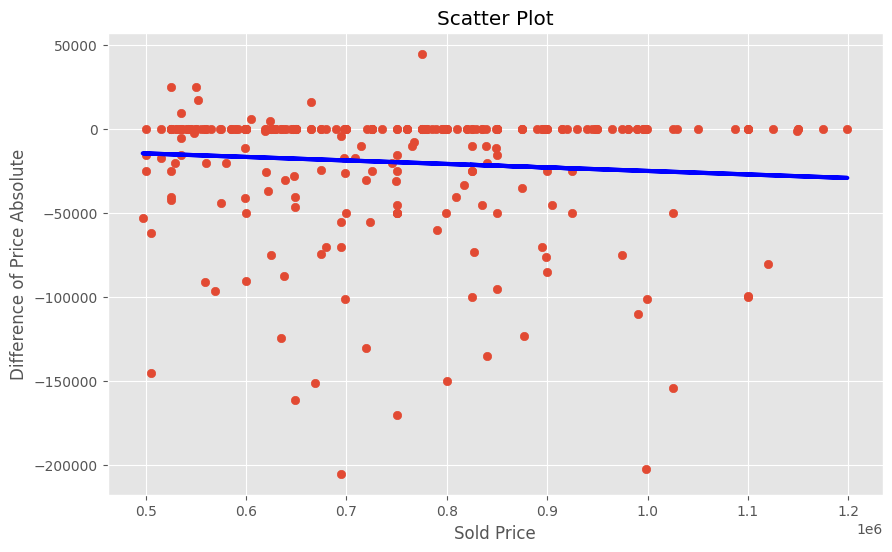

In [165]:
plt.scatter(df_clean['Sold_Price'], df_clean['DiffPriceAbsolute'])

plt.plot(df_clean['Sold_Price'],DiffPriceAbsolute_sold_ols.predict(),color='blue',linewidth=3)
plt.xlabel('Sold Price')
plt.ylabel('Difference of Price Absolute')
plt.title('Scatter Plot')

In [166]:
#DiffPriceRelative prediction based only on Sold Price
DiffPriceRelative_sold_ols = sm.ols(formula = 'DiffPriceRelative ~ Sold_Price',
                       data = df_clean).fit()

DiffPriceRelative_sold_ols.summary()
#r-square value of 0.00

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DiffPriceRelative   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.009077
Date:                Fri, 21 Feb 2025   Prob (F-statistic):              0.924
Time:                        17:26:38   Log-Likelihood:                 471.65
No. Observations:                 282   AIC:                            -939.3
Df Residuals:                     280   BIC:                            -932.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9756      0.013     77.451      0.000       0.951       1.000
Sold_Price  1.578e-09   1.66e-08      0.095      0.924    -3.1e-08    3.42e-08
==============================================================================
Omnibus:                      128.410   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.649
Skew:                          -2.061   Prob(JB):                     2.26e-93
Kurtosis:                       7.396   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Scatter Plot')

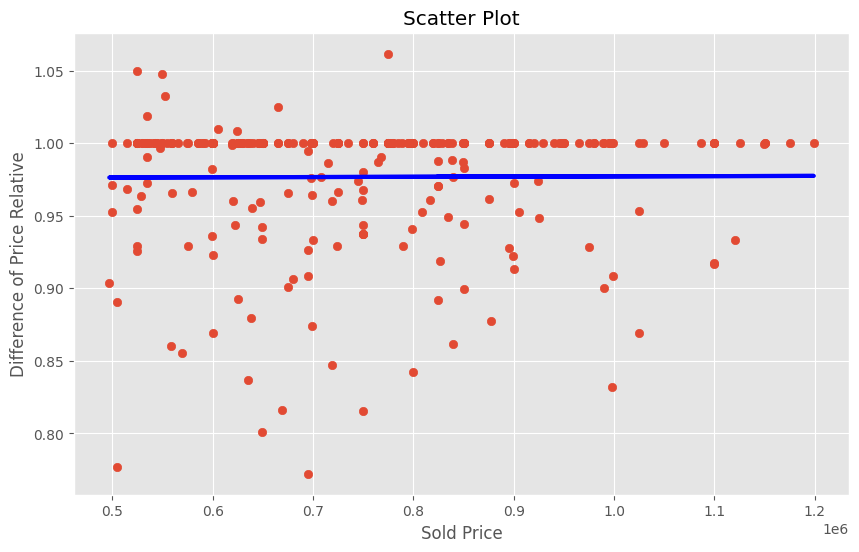

In [167]:
plt.scatter(df_clean['Sold_Price'], df_clean['DiffPriceRelative'])

plt.plot(df_clean['Sold_Price'],DiffPriceRelative_sold_ols.predict(),color='blue',linewidth=3)
plt.xlabel('Sold Price')
plt.ylabel('Difference of Price Relative')
plt.title('Scatter Plot')

**Your Interpretation:**  

**Question 3:**  Based on your answer to question two, why are these models different/the same?  

This data helps me understand that these models basically are the same as I predicted, with the numerical difference of what they represent having a very small effect on the r-squared value. We can see that the r-sqaure of DiffPriceAbsolute is .0008 which is very low, and for DiffPriceRelative is .0000 which is none. These variables dont explain much of the variance in sold price. The distribution of data for both of these 2 variables with sold price is very similar, with DiffPriceAbsolute having some bigger outliers like -200,000, which supports my idea that because of these bigger numbers, it is changing the prediction slightly and aiding in the explination of sold price, increasing the r-squared, but only by a very small amount. 




### Task 7

There is another dataset that contains similar information from 2016. Try to identify the importance of the variables in predicting the sold price. Compare this with the current dataset and discuss how the importance of the variables has changed over time. In short, do:

1. Import the 2018 dataset ([`train1-2016.csv`](train1-2016.csv) and [`train2-2016.csv`](train2-2016.csv))
1. Clean the data (pick the price range, remove the columns you don't want, convert the data types, etc.)
1. Write the ols formula for the model to fit for the columns you selected to predict the sold price, then fit the model
1. Compare 2 models and Discuss the changes in the importance of the variables

In [168]:
# Code goes here
#1
#load in data
train1_2016 = pd.read_csv('train1-2016.csv')
train2_2016 = pd.read_csv('train2-2016.csv')

df7 = pd.concat([train1_2016, train2_2016])
#print(df7.columns.tolist())

df7 = df7[['Acres', 'Deck', 'Latitude', 'Longitude', 'LstPrice', 'SoldPrice', 'StatCode', 
           'Taxes', 'TotBed', 'TotSqf', 'TotKitch', 'YearBlt','TotBth', 'Zip']].copy()

#2
#clean data
#df7['LstPrice'].describe()

#Based on the describe stats, the 1st quartile is 234975, so I am cutting off the bottom 25% of the data. The 3rd quartile is 561000, 
#however, based on the limit of 1.2 million in the early problems, and seeing that our max is 3.5 million, I think it would be good to 
#keep some data that is in the 1 million range. So my upper limit for listing price will be 1.2 million
df7 = df7[(df7['LstPrice'] >= 234975) & (df7['LstPrice']<= 1200000)]

#I will remove rows that has taxes equal to 1
df7= df7[df7['Taxes'] != 1]

#check datatypes and convert necessary numbers
#print(df7.dtypes)

#after using once it throws an error when it runs again. Now total square feet is a float.

df7['TotSqf'] = df7['TotSqf'].str.replace(',', '').astype(float)

In [169]:
#3
#OLS formula
sold_train16_ols = sm.ols(formula = 'SoldPrice ~ Acres + LstPrice  +  Deck + Latitude + Longitude + StatCode + Taxes + TotBed + TotSqf + TotKitch + YearBlt + TotBth + Zip',
                       data = df7).fit()
sold_train16_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2100.
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          3.44e-226
Time:                        17:26:55   Log-Likelihood:                -2763.1
No. Observations:                 245   AIC:                             5550.
Df Residuals:                     233   BIC:                             5592.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.327e-06   1.12e-05      0.386      0.700   -1.77e-05    2.64e-05
Acres      -1.286e+04   1.69e+04     -0.760      0.448   -4.62e+04    2.05e+04
LstPrice       0.9547      0.013     72.680      0.000       0.929       0.981
Deck        -788.7930   1696.388     -0.465      0.642   -4131.014    2553.427
Latitude    3.944e+05   2.72e+05      1.449      0.149   -1.42e+05    9.31e+05
Longitude   1.438e+05   9.92e+04      1.449      0.149   -5.17e+04    3.39e+05
StatCode   -3.961e-10   2.73e-10     -1.452      0.148   -9.33e-10    1.41e-10
Taxes         -0.0329      0.062     -0.529      0.597      -0.155       0.090
TotBed       317.2256   1595.773      0.199      0.843   -2826.763    3461.214
TotSqf        -1.7143      2.696     -0.636      0.526      -7.027       3.598
TotKitch    -750.9295   2194.778     -0.342      0.733   -5075.077    3573.218
YearBlt       -3.2854     39.255     -0.084      0.933     -80.626      74.056
TotBth     -1831.1808   2154.081     -0.850      0.396   -6075.145    2412.784
Zip            0.3625      0.942      0.385      0.701      -1.493       2.218
==============================================================================
Omnibus:                       92.768   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.118
Skew:                          -1.370   Prob(JB):                    5.76e-120
Kurtosis:                       9.803   Cond. No.                     1.05e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.39e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Your Interpretation:**  

Our r-squared value of .99 means that we might have over fit our data, while it explains basically all of the variance in our data it would most likely not do a good job of prediciting on new data.

In [170]:
#the r-square value is really high and almost seems like a red flag, I am taking out LstPrice to see how this effects the r-square value
WO_LstPrice_ols = sm.ols(formula = 'SoldPrice ~ Acres + Deck + Latitude + Longitude + StatCode + Taxes + TotBed + TotSqf + TotKitch + YearBlt + TotBth + Zip',
                       data = df7).fit()
WO_LstPrice_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     75.59
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.51e-67
Time:                        17:27:00   Log-Likelihood:                -3150.7
No. Observations:                 245   AIC:                             6323.
Df Residuals:                     234   BIC:                             6362.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.293e-05   5.42e-05     -1.161      0.247      -0.000    4.39e-05
Acres       1.473e+05   8.14e+04      1.810      0.072    -1.3e+04    3.08e+05
Deck       -2560.9439   8234.912     -0.311      0.756   -1.88e+04    1.37e+04
Latitude    4.948e+06   1.29e+06      3.847      0.000    2.41e+06    7.48e+06
Longitude   1.804e+06   4.69e+05      3.848      0.000     8.8e+05    2.73e+06
StatCode    2.884e-09   7.63e-10      3.779      0.000    1.38e-09    4.39e-09
Taxes          0.0646      0.302      0.214      0.830      -0.529       0.659
TotBed      7797.9177   7731.155      1.009      0.314   -7433.646     2.3e+04
TotSqf        83.7827     11.779      7.113      0.000      60.576     106.990
TotKitch   -1.925e+04   1.06e+04     -1.819      0.070   -4.01e+04    1598.677
YearBlt      317.6413    189.371      1.677      0.095     -55.448     690.731
TotBth      2.596e+04   1.03e+04      2.522      0.012    5678.936    4.62e+04
Zip           -5.3127      4.558     -1.166      0.245     -14.292       3.667
==============================================================================
Omnibus:                       29.167   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.037
Skew:                           0.743   Prob(JB):                     7.44e-10
Kurtosis:                       4.381   Cond. No.                     2.90e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [171]:
#4
#I am taking out variables that are not significant to compare
#Removing Deck, Taxes, TotBed, YearBlt, and Zip. I am keeping Acres and TotKitch even though their p value is .07, I want to see how
#their significance will change as I take out these variables

removed_var_ols = sm.ols(formula = 'SoldPrice ~ Acres +Latitude + Longitude + StatCode + TotSqf + TotKitch + TotBth',
                       data = df7).fit()
removed_var_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     125.9
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           6.07e-71
Time:                        17:27:07   Log-Likelihood:                -3152.4
No. Observations:                 245   AIC:                             6319.
Df Residuals:                     238   BIC:                             6343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.774e+05   9.86e+04      1.800      0.073   -1.68e+04    3.72e+05
Acres       1.531e+05    8.1e+04      1.890      0.060   -6442.611    3.13e+05
Latitude    5.312e+06   1.24e+06      4.282      0.000    2.87e+06    7.76e+06
Longitude   1.936e+06   4.52e+05      4.283      0.000    1.05e+06    2.83e+06
StatCode    1.489e-08   3.49e-09      4.265      0.000    8.01e-09    2.18e-08
TotSqf        84.9316     10.883      7.804      0.000      63.493     106.371
TotKitch   -1.773e+04   1.04e+04     -1.700      0.091   -3.83e+04    2820.134
TotBth      3.232e+04   9616.970      3.361      0.001    1.34e+04    5.13e+04
==============================================================================
Omnibus:                       27.256   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.757
Skew:                           0.720   Prob(JB):                     6.33e-09
Kurtosis:                       4.274   Cond. No.                     1.55e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.52e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Your Interpretation:**  

With how high our r-square value started (.99), I decided to take out listing price because I believed it was overfitting our data. From there, the variables I chose gave me an r-squared value of .764, 76.4% of the variance in sold price can be explained by the variables I had chosen. Although this was a lower r-squared value it seemed like less of a red flag.  

Moving on from there, I decided to take out the insignificant variables based on their p-values being greater than .05. I took out the variables Deck, Taxes, TotBed, YearBlt, and Zip. I kept acres and TotKitch even though their p-values were .07, I was curious to see if their p-value changed to be significant once these other values had been taken out. With the new model with variables Acres, Latitude, Longitude, StatCode, TotSqf, TotKitch and TotBth - we saw that TotKitch was still not significant and that Acres had a p-value of .06, so not significant but closer to the cut off point of .05.  

Our second model, after taking out variables and keeping the variable listed above had an r-square value of .760, meaning 76.0% of the variance in sold price can be explained by the variables we had in the model. This was only a .4% decrease from the other model that kept the variables but did not have listing price. Of course bother are about a .23 r-square decrease from the model that included listing price.